In [10]:
from src.fem_radial import *
import matplotlib.pyplot as plt
from scipy.linalg import eigh
from scipy.sparse.linalg import eigsh
import numpy as np
from scipy.constants import eV
import sys

sys.path.append("../")

In [11]:
xs = np.linspace(0, 1, 500)
xs = np.exp(1.1 * xs) - 1
xs /= xs[-1] * 1e9
fem = FemRadial(xs)

In [12]:
K = fem.get_K()
V = fem.get_V()
M = fem.get_M()

In [13]:
K

array([[ 2.24052240e-51, -2.24052240e-51,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.24052240e-51,  1.79143229e-50, -1.56738005e-50, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -1.56738005e-50,  5.82092888e-50, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         3.67847998e-45, -1.84329690e-45,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.84329690e-45,  1.84126215e-45,  2.03475477e-48],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  2.03475477e-48, -2.03475477e-48]])

In [14]:
V

array([[-2.33107032e-53, -2.33107032e-53, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-2.33107032e-53, -1.86794397e-52, -7.01379950e-53, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00, -7.01379950e-53, -3.74723153e-52, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       ...,
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -5.05430273e-49, -1.26706063e-49, -0.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -1.26706063e-49,  5.74233172e-47,  1.92256463e-47],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00,  1.92256463e-47,  1.92256463e-47]])

In [15]:
val, vec = eigsh((K + V)[:-2, :-2], 3, M[:-2, :-2], which="LA", sigma=-1e-10)
# val, vec = eigsh((K + V)[:-1, :-1], 1, M[:-1, :-1], which="SA")
vec = vec / np.linalg.norm(vec, axis=0)

Text(0, 0.5, 'Wavefunction')

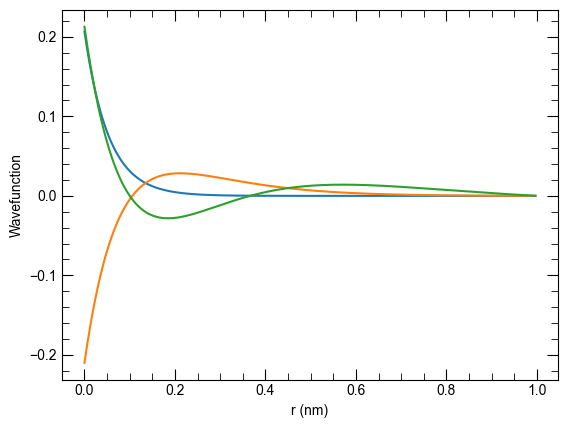

In [16]:
fig, ax = plt.subplots()
ax.plot(xs[:-1] / 1e-9, vec)
ax.set_xlabel("r (nm)")
ax.set_ylabel("Wavefunction")

In [17]:
val

array([-2.17976170e-18, -5.44803395e-19, -2.06724132e-19])

In [18]:
val / eV

array([-13.60500245,  -3.40039533,  -1.29027055])